In [1]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
import matplotlib.image as pltimg
import statsmodels.api as smf
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from scipy.stats import zscore
from sklearn import svm
from datetime import datetime
from datetime import datetime, timedelta
from sklearn.metrics import confusion_matrix, recall_score , precision_score , f1_score , accuracy_score, roc_auc_score

# ::--------------------------- Exploratory Data Analysis ---------------------------- ::

In [2]:
# Importing the dataset

Letters = pd.read_csv('letters.csv')

# Displaying first 5 rows

Letters.head(5)

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0


In [3]:
# Statistical Dataset Analysis of Numeric Series

Letters.describe().T

,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.887730,0.0,2.0,4.0,7.0,9.0
pixel43,42000.0,0.171357,5.726352,0.0,0.0,0.0,0.0,255.0
pixel44,42000.0,0.164476,5.515774,0.0,0.0,0.0,0.0,255.0
pixel92,42000.0,1.192833,14.692403,0.0,0.0,0.0,0.0,255.0
pixel124,42000.0,28.043952,70.505431,0.0,0.0,0.0,0.0,255.0
pixel125,42000.0,36.084976,78.631145,0.0,0.0,0.0,0.0,255.0
pixel126,42000.0,42.713952,84.390533,0.0,0.0,0.0,10.0,255.0
pixel127,42000.0,46.092310,87.287033,0.0,0.0,0.0,29.0,255.0
pixel128,42000.0,44.542452,85.740313,0.0,0.0,0.0,21.0,255.0
pixel129,42000.0,38.948524,81.223946,0.0,0.0,0.0,0.0,255.0


In [4]:
# Exploratory Analysis and Summary of the Dataset

Letters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   label     42000 non-null  int64
 1   pixel43   42000 non-null  int64
 2   pixel44   42000 non-null  int64
 3   pixel92   42000 non-null  int64
 4   pixel124  42000 non-null  int64
 5   pixel125  42000 non-null  int64
 6   pixel126  42000 non-null  int64
 7   pixel127  42000 non-null  int64
 8   pixel128  42000 non-null  int64
 9   pixel129  42000 non-null  int64
 10  pixel130  42000 non-null  int64
 11  pixel131  42000 non-null  int64
 12  pixel132  42000 non-null  int64
 13  pixel133  42000 non-null  int64
 14  pixel134  42000 non-null  int64
 15  pixel135  42000 non-null  int64
 16  pixel136  42000 non-null  int64
 17  pixel137  42000 non-null  int64
 18  pixel138  42000 non-null  int64
 19  pixel146  42000 non-null  int64
 20  pixel147  42000 non-null  int64
 21  pixel148  42000 non-null  int64
 22

In [5]:
# Displaying number of Null Values in the dataset

print('Sum of null values: {}'.format(Letters.isnull().sum()))

Sum of null values: label       0
pixel43     0
pixel44     0
pixel92     0
pixel124    0
pixel125    0
pixel126    0
pixel127    0
pixel128    0
pixel129    0
pixel130    0
pixel131    0
pixel132    0
pixel133    0
pixel134    0
pixel135    0
pixel136    0
pixel137    0
pixel138    0
pixel146    0
pixel147    0
pixel148    0
pixel149    0
pixel150    0
pixel151    0
pixel152    0
pixel153    0
pixel154    0
pixel155    0
pixel156    0
pixel157    0
pixel158    0
pixel159    0
pixel160    0
pixel327    0
pixel328    0
pixel329    0
pixel351    0
pixel410    0
pixel411    0
pixel412    0
pixel413    0
pixel414    0
pixel415    0
pixel416    0
pixel417    0
dtype: int64


In [6]:
# Checking Duplicate Values

Duplicates = Letters[Letters.duplicated()]
print("Duplicate rows: ", Duplicates.shape)

Duplicate rows:  (1633, 46)


In [7]:
# Splitting Dataset into Train and Test Set for Target(Dependent) and Independent Variables

np.random.seed(42)

Independent_Var = Letters.iloc[:, list(range(46))]
Independent_Var = Independent_Var.drop('label',axis=1)
Target_Var = Letters['label']
Independent_Var_train, Independent_Var_test, Target_Var_train, Target_Var_test = train_test_split(Independent_Var, Target_Var, test_size = 0.30, random_state = 30)

In [8]:
# Features before Mean Normalization

unscaled_features = Independent_Var_train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Independent_Var_train_array = sc.fit_transform(Independent_Var_train.values)

# Assign the scaled data to a DataFrame & use the index and columns arguments to keep original indices and column names:

Independent_Var_train = pd.DataFrame(Independent_Var_train_array, index = Independent_Var_train.index, columns = Independent_Var_train.columns)
Independent_Var_test_array = sc.transform(Independent_Var_test.values)
Independent_Var_test = pd.DataFrame(Independent_Var_test_array, index = Independent_Var_test.index, columns = Independent_Var_test.columns)

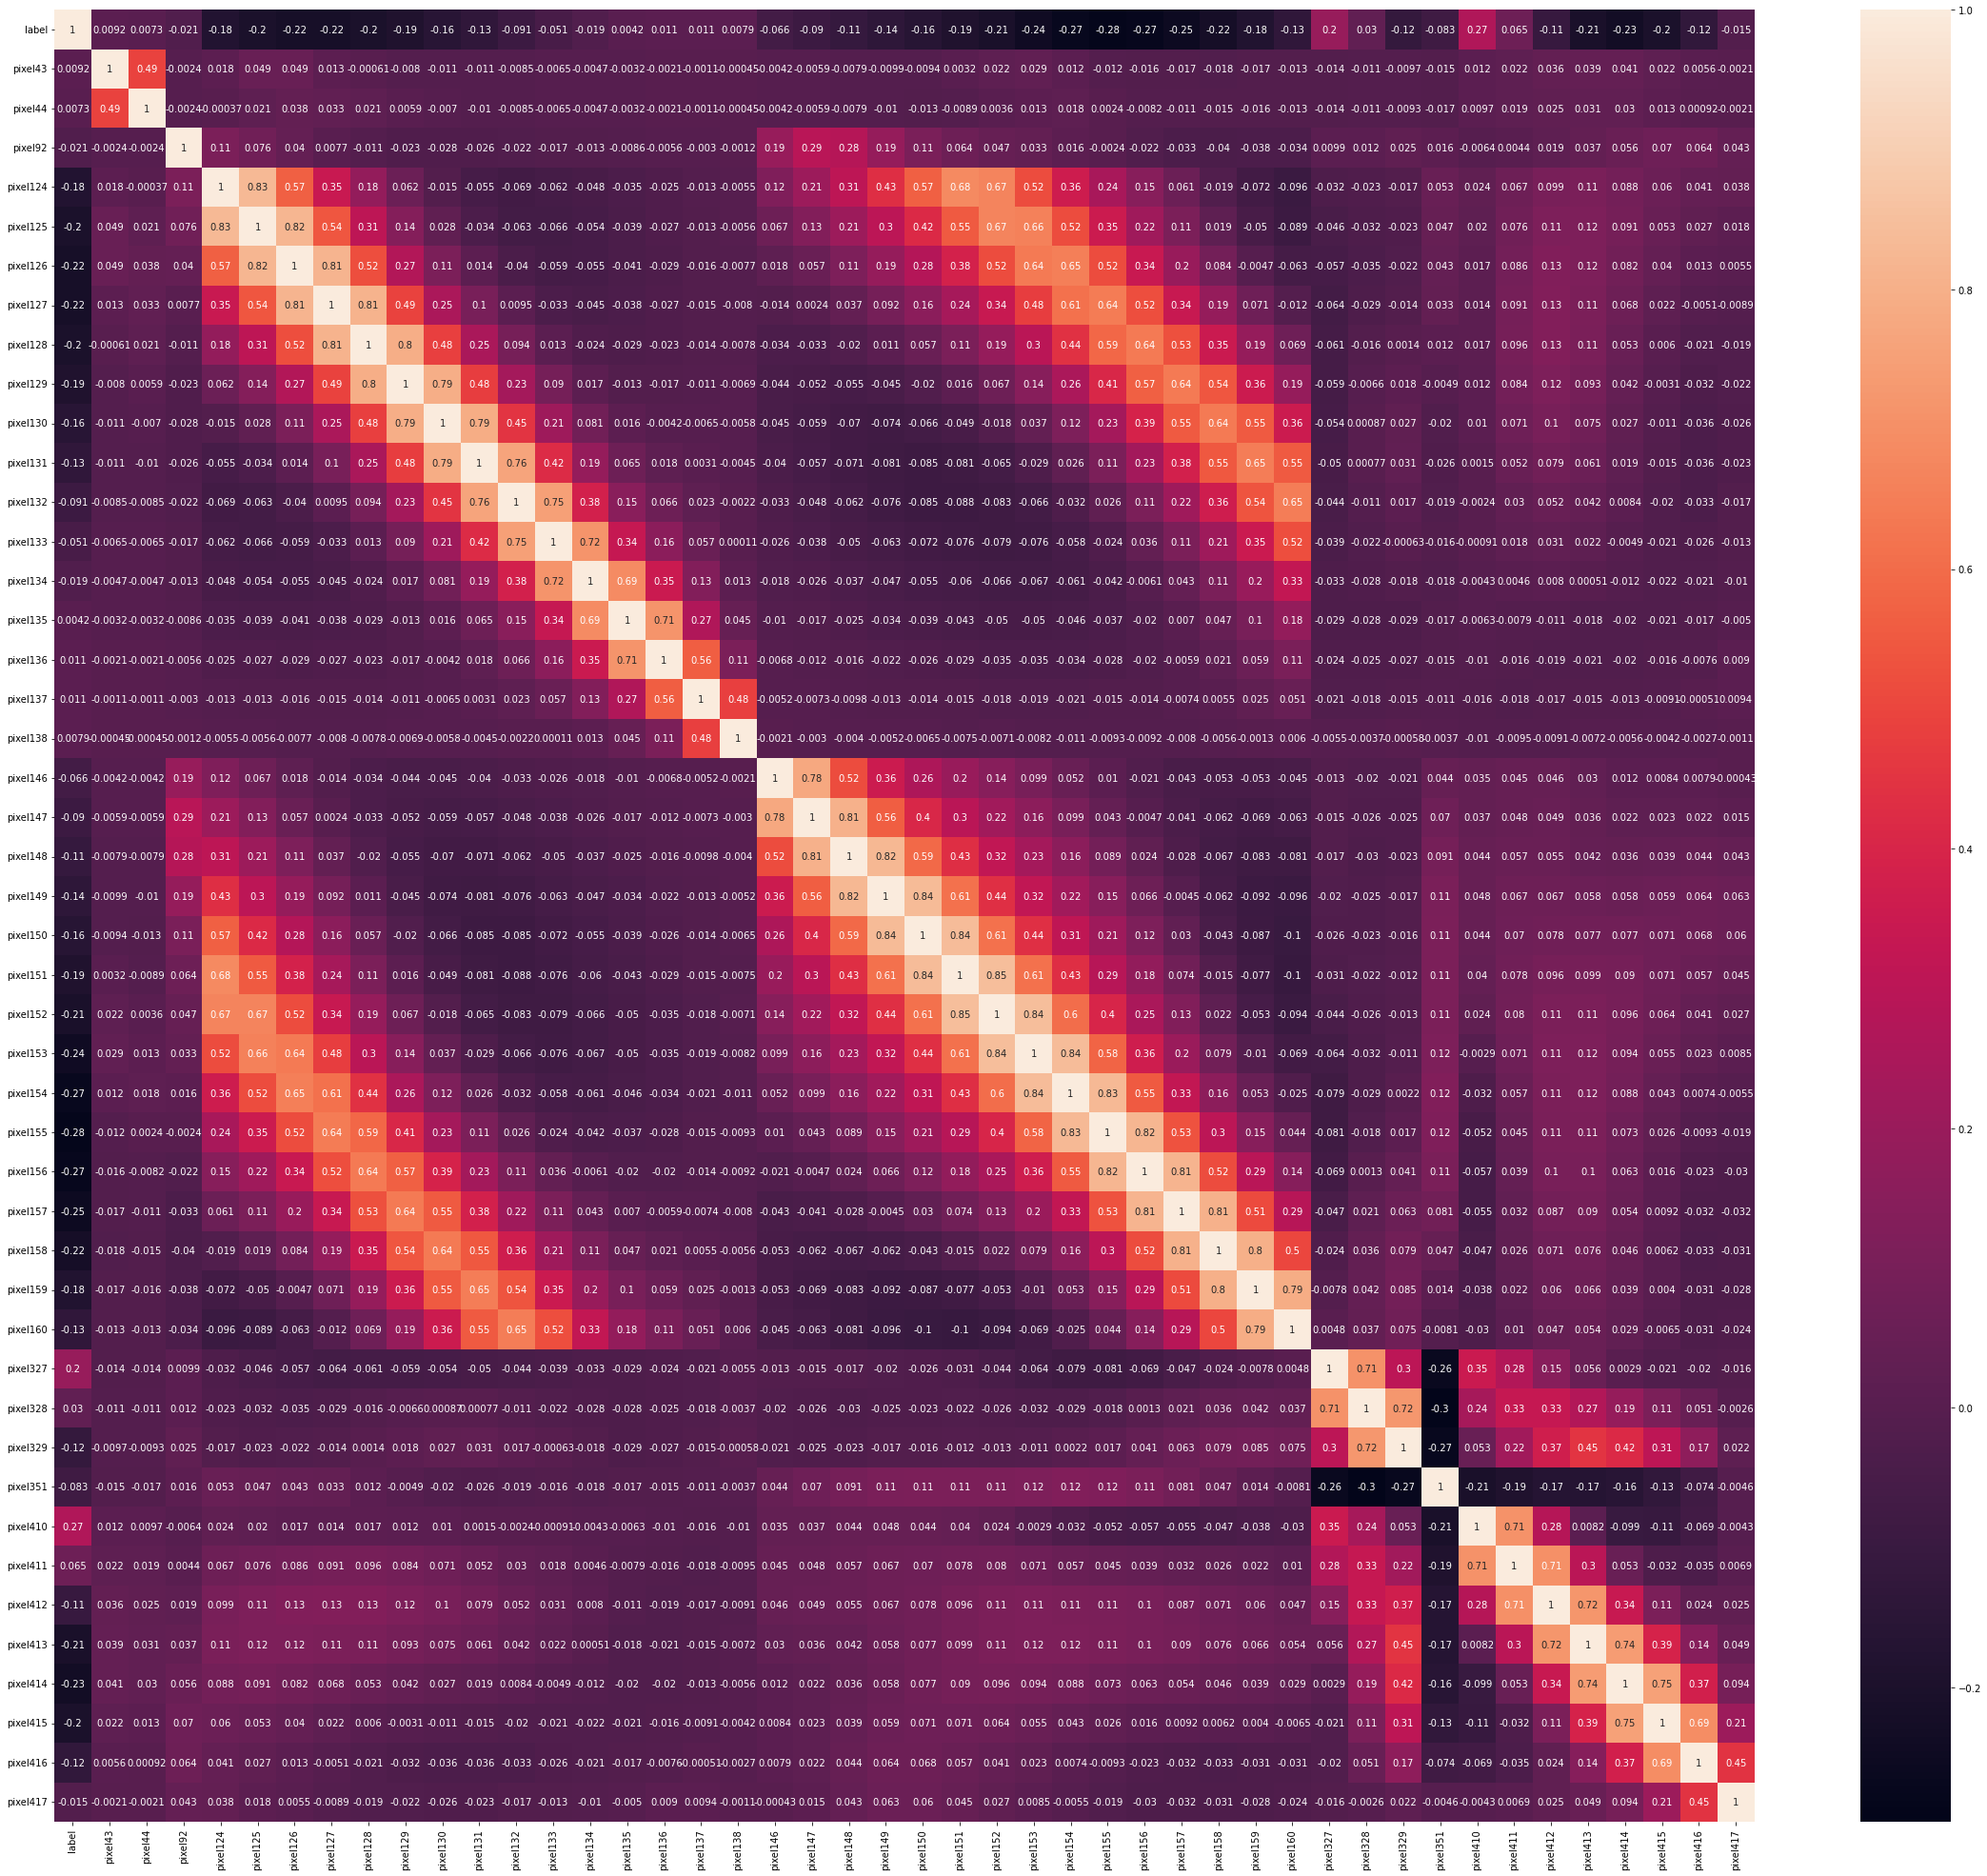

In [9]:
# Correlation Matrix Heat Map

plt.figure(figsize = (40,35))
sns.heatmap(Letters.corr(), annot = True)
plt.show()

# ::------------------------- Building K-Nearest Neighbor Model --------------------------::

In [10]:
# Finding the best value of K

parameters = {"n_neighbors": range(1, 50)}
GS_CV = GridSearchCV(KNeighborsClassifier(), parameters)
GS_CV.fit(Independent_Var_train, Target_Var_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [11]:
# Displaying the best parameter and the K-Value

GS_CV.best_params_

{'n_neighbors': 12}

In [20]:
# Fitting KNN Model

import datetime
start_time = datetime.datetime.now()
KNN_Model = KNeighborsClassifier(n_neighbors = 12)
KNN_Model.fit(Independent_Var_train, Target_Var_train)
KNN_Pred = KNN_Model.predict(Independent_Var_test)
print(KNN_Pred)
datetime.datetime.now() - start_time

[9 4 8 ... 1 1 1]


datetime.timedelta(seconds=8, microseconds=457665)

In [21]:
# Printing the accuracy score of the model

print(KNN_Model.score(Independent_Var_test, Target_Var_test))

0.6517460317460317


In [22]:
# Printing the confusion matrix & Classification report for KNN Model

KNN_CM = confusion_matrix(Target_Var_test, KNN_Pred)
print(KNN_CM)

print(classification_report(Target_Var_test, KNN_Pred))

[[1118    3   24    6   18    9   42   22    6    7]
 [   0 1339    7   16   10    8    6    8   14   10]
 [  80   28  746  115   21   16   34   50   83   36]
 [  21   50  179  712   17   73   15   41  161   59]
 [  32  109    9   29  639   40   37  192   17  129]
 [  16   48   31  187   44  618   46   67   25   50]
 [  51   35   29   17   18   28 1080    1    2    0]
 [  10    6   10   35   55   70    0  843   19  273]
 [  26  109  121  161   28   56   26   35  582   43]
 [  25   14    4   54   41   47    0  489   47  535]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1255
           1       0.77      0.94      0.85      1418
           2       0.64      0.62      0.63      1209
           3       0.53      0.54      0.54      1328
           4       0.72      0.52      0.60      1233
           5       0.64      0.55      0.59      1132
           6       0.84      0.86      0.85      1261
           7       0.48      0.64   

In [23]:
# Printing the Mean Absolute Error for KNN Model

print ('KNN MAE: ' + str(mean_absolute_error(Target_Var_test, KNN_Pred)))

KNN MAE: 1.1513492063492063


# ::------------------------- Building Neural Network Model ----------------------------::

In [24]:
# Fitting NN Model

start_time = datetime.datetime.now()
NN_Model = MLPClassifier(random_state = 30, max_iter = 15000).fit(Independent_Var_train, Target_Var_train)
NN_Model.predict_proba(Independent_Var_test)
NN_Model_Pred = NN_Model.predict(Independent_Var_test)
print(NN_Model_Pred)
datetime.datetime.now() - start_time

[9 4 8 ... 1 1 1]


datetime.timedelta(seconds=99, microseconds=849075)

In [25]:
# Printing the accuracy score of the model

print(NN_Model.score(Independent_Var_test, Target_Var_test))

0.6861111111111111


In [26]:
# Printing the confusion matrix & Classification report for NN Model

NN_CM = confusion_matrix(Target_Var_test, NN_Model_Pred)
print(NN_CM)

print(classification_report(Target_Var_test, NN_Model_Pred)) 

[[1090    3   41    9   24   11   33   16    8   20]
 [   1 1323    6    9   11   24    7    1   19   17]
 [  60   19  760   98   23   25   11   39  120   54]
 [   6   16  133  734   15  141    8   24  168   83]
 [  25   58   20   13  704   43   27  153   20  170]
 [   9   19   18  100   22  776   40   47   26   75]
 [  22   14   16    9   26   54 1105    2   13    0]
 [   9    9    6   10   41   73    1  778   16  378]
 [  10   59   94  135   25   72   13   21  680   78]
 [  17    6    8   28   26   43    1  389   43  695]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1255
           1       0.87      0.93      0.90      1418
           2       0.69      0.63      0.66      1209
           3       0.64      0.55      0.59      1328
           4       0.77      0.57      0.65      1233
           5       0.61      0.69      0.65      1132
           6       0.89      0.88      0.88      1261
           7       0.53      0.59   

In [27]:
# Printing the Mean Absolute Error for NN Model

print ('ANN MAE: ' + str(mean_absolute_error(Target_Var_test, NN_Model_Pred)))

ANN MAE: 1.033015873015873
